In [1]:
# Calcula diferentes tipos de correlaciones.

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from scipy import stats

In [2]:
# Conjunto 1
df_1 = pd.DataFrame((np.array([
    (0, 1, 2, 3, 4, 7, 9, 12, 16, 20),
    (0, 3, 6, 8, 11, 13, 14, 15, 16, 16)])
    .transpose()), columns = ["x", "y"])

# Conjunto 2
df_2 = pd.DataFrame((np.array([
    (2, 3, 4, 5, 6, 7, 8, 9, 10, 20),
    (8, 4, 9, 2, 5, 6, 3, 1, 7, 17)])
    .transpose()), columns = ["x", "y"])

Pearson: 0.869
Spearman: 0.997


Text(0.5, 1.0, 'Conjunto de datos 1')

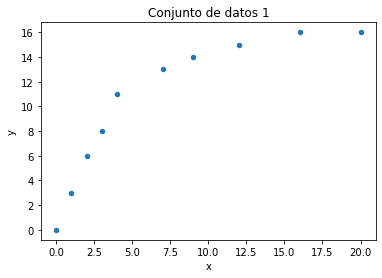

In [3]:
# Correlación de Pearson
print("Pearson: " + f"{df_1.corr().iat[1, 0]:.3f}")
# Correlación de Spearman
print("Spearman: "
    + f"{df_1.corr(method = 'spearman').iat[1, 0]:.3f}")

# Se grafican los valores.
df_1.plot.scatter("x", "y")
plt.title("Conjunto de datos 1")

Pearson: 0.615
Pearson sin extremos: -0.350
Spearman: 0.018


Text(0.5, 1.0, 'Conjunto de datos 2')

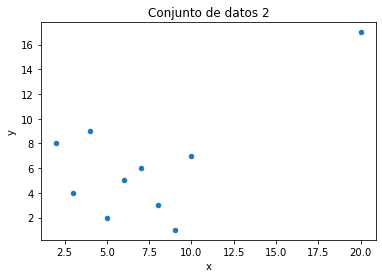

In [4]:
# Correlación de Pearson
print("Pearson: " + f"{df_2.corr().iat[1, 0]:.3f}")
# Se eliminan los valores extremos y se recalcula.
print("Pearson sin extremos: "
    + f"{df_2[:-1].corr().iat[1, 0]:.3f}")
# Correlación de Spearman
print("Spearman: "
    + f"{df_2.corr(method = 'spearman').iat[1, 0]:.3f}")

# Se grafican los valores.
df_2.plot.scatter("x", "y")
plt.title("Conjunto de datos 2")

In [5]:
path = "../datos/"
fname = "A.1_Wilks.csv"

# Se cargan los datos de la tabla 1 de Wilks.
df = pd.read_csv(path + fname, index_col = "Date")

In [6]:
# Correlaciones de Pearson.
df.corr()

,Ithaca - Precipitation,Ithaca - Max Temp,Ithaca - Min Temp,Canandaigua - Precipitation,Canandaigua - Max Temp,Canandaigua - Min Temp
Ithaca - Precipitation,1.000000,-0.023723,0.286798,0.965481,-0.039416,0.218115
Ithaca - Max Temp,-0.023723,1.000000,0.717981,0.018033,0.957135,0.760798
Ithaca - Min Temp,0.286798,0.717981,1.000000,0.267174,0.762209,0.923698
Canandaigua - Precipitation,0.965481,0.018033,0.267174,1.000000,-0.015120,0.188445
Canandaigua - Max Temp,-0.039416,0.957135,0.762209,-0.015120,1.000000,0.810169
Canandaigua - Min Temp,0.218115,0.760798,0.923698,0.188445,0.810169,1.000000


In [7]:
# Correlaciones de Spearman.
df.corr(method = "spearman")

,Ithaca - Precipitation,Ithaca - Max Temp,Ithaca - Min Temp,Canandaigua - Precipitation,Canandaigua - Max Temp,Canandaigua - Min Temp
Ithaca - Precipitation,1.000000,0.319388,0.596504,0.750160,0.266784,0.514195
Ithaca - Max Temp,0.319388,1.000000,0.761356,0.280813,0.944327,0.789628
Ithaca - Min Temp,0.596504,0.761356,1.000000,0.545772,0.749444,0.915757
Canandaigua - Precipitation,0.750160,0.280813,0.545772,1.000000,0.187280,0.351790
Canandaigua - Max Temp,0.266784,0.944327,0.749444,0.187280,1.000000,0.775552
Canandaigua - Min Temp,0.514195,0.789628,0.915757,0.351790,0.775552,1.000000


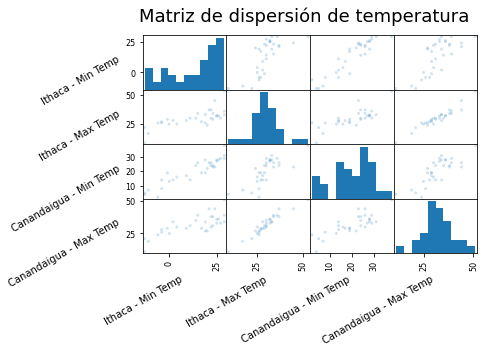

In [8]:
# Matriz de dispersión de temperaturas.

temp = ["Ithaca - Min Temp", "Ithaca - Max Temp",
    "Canandaigua - Min Temp", "Canandaigua - Max Temp"]

# Se grafica.
axes = pd.plotting.scatter_matrix(df.loc[:, temp], alpha=0.2)
for ax in axes.flatten():
    # Rotation de la etiqueta.
    ax.xaxis.label.set_rotation(30)
    # Alineación de la etiqueta.
    ax.xaxis.label.set_ha('right')
    ax.yaxis.label.set_rotation(30)
    ax.yaxis.label.set_ha('right')

plt.suptitle("Matriz de dispersión de temperatura",
    fontsize = "18")

plt.show()

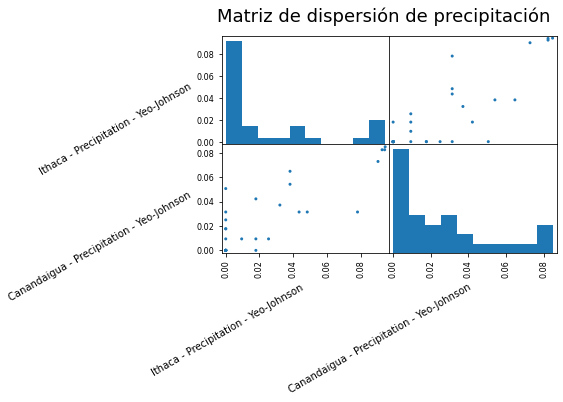

In [9]:
# Matriz de dispersión de precipitaciones.

pre = ["Ithaca - Precipitation", "Canandaigua - Precipitation"]
pre_t = ["Ithaca - Precipitation - Yeo-Johnson",
    "Canandaigua - Precipitation - Yeo-Johnson"]

lmbda = [None] * 2

# Se hace la transformación Yeo-Johnson.
df[pre_t[0]], lmbda[0] = stats.yeojohnson(df[pre[0]])
df[pre_t[1]], lmbda[1] = stats.yeojohnson(df[pre[1]])

# Se grafica.
axes = pd.plotting.scatter_matrix(df[pre_t], alpha = 1)

for ax in axes.flatten():
    # Rotation de la etiqueta.
    ax.xaxis.label.set_rotation(30)
    # Alineación de la etiqueta.
    ax.xaxis.label.set_ha('right')
    ax.yaxis.label.set_rotation(30)
    ax.yaxis.label.set_ha('right')

    # Se ajustan los ticks superiores derechos,
    # que tienen problemas.
    (axes.flatten()[0]
        .set_yticklabels(pd.Series(np.arange(0, 0.1, step = 0.02) )
        .map('{:.2f}'.format) ) )

plt.suptitle("Matriz de dispersión de precipitación",
    fontsize = "18")

plt.show()

In [21]:
sns.scatterplot(data = df[temp[0:2]].where(df[pre[0]] >= 0.01),
    x = temp[0], y = temp[1], color = "red")
sns.rugplot(data = df[temp[0:2]].where(df[pre[0]] >= 0.01),
    x = temp[0], y = temp[1], color = "red",
    height = -0.02, clip_on = False)

sns.scatterplot(data = df[temp[0:2]].where(df[pre[0]] < 0.01),
    x = temp[0], y = temp[1], color = "blue")
sns.rugplot(data = df[temp[0:2]].where(df[pre[0]] < 0.01),
    x = temp[0], y = temp[1], color = "blue",
    height = -0.02, clip_on = False)

plt.title("Rugplot", fontsize = "18")

Text(0.5, 1.0, 'Rugplot')